In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Exercise 1
- a) Create and train simple regression model of radiation to Temperature.
- b) Evaluate and visualise created model.
- c) Create and plot higher order polynomial regression models.

# Create and train simple regression model of radiation to Temperature.

In this part, we build a simple linear regression model to predict temperature based on solar radiation using the `SolarPrediction.csv` dataset.

In [13]:
weather_df = pd.read_csv("SolarPrediction.csv")


In [14]:
weather_df.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


In [15]:
weather_df['Radiation'] = pd.to_numeric(weather_df['Radiation'], errors='coerce')
weather_df['Temperature'] = pd.to_numeric(weather_df['Temperature'], errors='coerce')
weather_df.dropna(subset=['Radiation', 'Temperature'], inplace=True)
weather_df = weather_df[weather_df['Radiation'] > 50]
corr_matrix = weather_df.select_dtypes(include='number').corr()
corr_list = corr_matrix.unstack()
corr_list = corr_list[corr_list < 1]
corr_list.index = [frozenset([i, j]) for i, j in corr_list.index]
corr_list = corr_list[~corr_list.index.duplicated()]
corr_list = corr_list.sort_values(ascending=False)
print(corr_list.head(25))


(Radiation, Temperature)                 0.570963
(Pressure, Temperature)                  0.366942
(Radiation, Pressure)                    0.233588
(UNIXTime, WindDirection(Degrees))       0.163668
(Speed, UNIXTime)                        0.162189
(Radiation, Speed)                       0.136495
(Speed, WindDirection(Degrees))          0.065609
(Humidity, WindDirection(Degrees))       0.041110
(Speed, Temperature)                     0.031041
(UNIXTime, Humidity)                    -0.006666
(Speed, Humidity)                       -0.070507
(Radiation, WindDirection(Degrees))     -0.108209
(Radiation, UNIXTime)                   -0.126993
(Temperature, WindDirection(Degrees))   -0.142804
(Pressure, Speed)                       -0.192776
(Pressure, WindDirection(Degrees))      -0.237932
(Pressure, Humidity)                    -0.271308
(Pressure, UNIXTime)                    -0.344906
(Radiation, Humidity)                   -0.432475
(UNIXTime, Temperature)                 -0.451593


## Based on the correlation analysis of all numeric features in the dataset:

- **Radiation and Temperature** show a relatively strong positive correlation: **0.571**.  
- Other correlations with Temperature are much weaker or negative (e.g., Temperature and Humidity: -0.635, UNIXTime and Temperature: -0.452).  

**Conclusion:**  
Since Radiation is the most strongly correlated feature with Temperature, it was chosen as the independent variable (X) and Temperature as the dependent variable (y) for a simple linear regression model.


In [30]:
weather_df['Radiation'] = pd.to_numeric(weather_df['Radiation'], errors='coerce')
weather_df['Temperature'] = pd.to_numeric(weather_df['Temperature'], errors='coerce')

weather_df.dropna(subset=['Radiation', 'Temperature'], inplace=True)

weather_df = weather_df[weather_df['Radiation'].notna()]

x = weather_df['Radiation'].values[:1000].reshape(-1,1)
y = weather_df['Temperature'].values[:1000]

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# b) Evaluate and visualize the created model

After training the linear regression model, we evaluate and visualize its performance.

## Model predictions
The trained model is used to predict:

`y_pred` — predictions for all input samples (x)

`y_test_pred` — predictions for the test set (X_test)
These values represent the model’s estimated temperature based on radiation levels.

## Sorting for visualization
To produce a smooth regression line, the input feature x and corresponding predictions y_pred are sorted in ascending order. This avoids the line “zigzagging” when plotted.

## Visualization
The actual temperature values are displayed as blue scatter points, while the model’s predictions are shown as a red regression line.

## Interpretation
The regression line represents the best linear fit between **radiation** and **temperature**, showing a clear positive correlation — as solar radiation increases, temperature generally rises.
The quality of this fit can later be assessed more quantitatively using metrics such as `Mean Squared Error`.

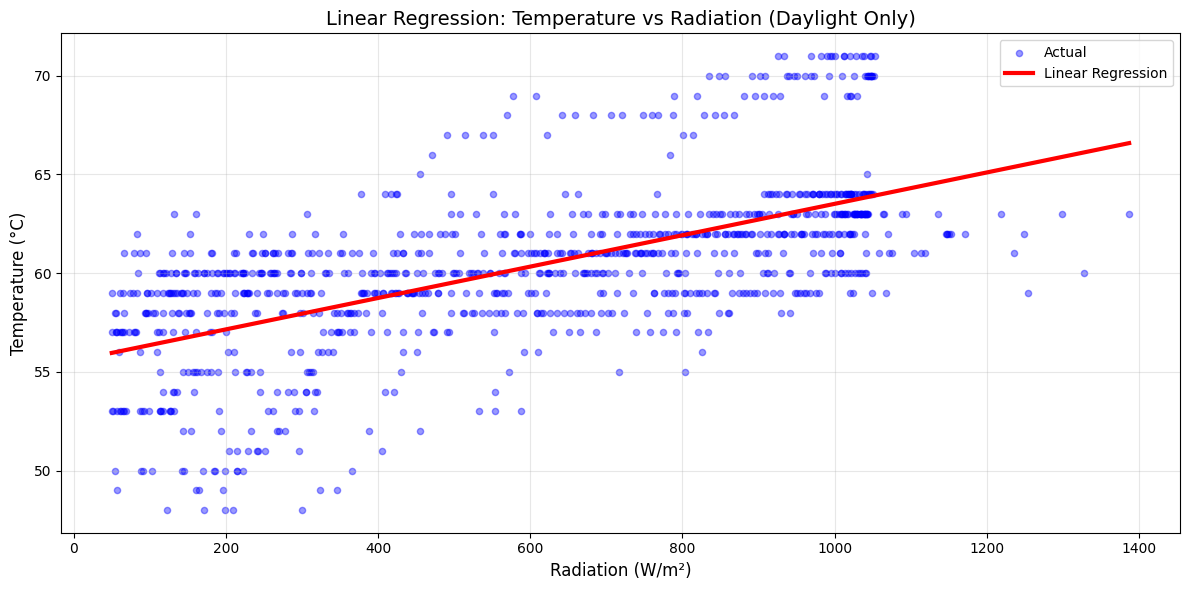

Mean squared error: 10.711749957386216


In [31]:

y_pred = model.predict(x)
y_test_pred = model.predict(X_test)

sorted_idx = np.argsort(x.flatten())
x_sorted = x.flatten()[sorted_idx]
y_sorted = y_pred[sorted_idx]

plt.figure(figsize=(12,6))
plt.scatter(x.flatten(), y, alpha=0.4, s=20, label="Actual", color='blue')
plt.plot(x_sorted, y_sorted, color='red', linewidth=3, label="Linear Regression")
plt.xlabel("Radiation (W/m²)", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.title("Linear Regression: Temperature vs Radiation (Daylight Only)", fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
print('Mean squared error:',mean_squared_error(y, (x*model.coef_+model.intercept_)))



In [ ]:
print("\n=== MODEL EVALUATION ===")
print(f"Training MSE: {mean_squared_error(y_train, model.predict(X_train)):.2f}")
print(f"Test MSE: {mean_squared_error(y_test, y_test_pred):.2f}")
print(f"Overall MSE: {mean_squared_error(y, y_pred):.2f}")



=== MODEL EVALUATION ===
Training MSE: 10.82
Test MSE: 10.29
Overall MSE: 10.71


## Observations
We observe that for very high-degree polynomial regression, the training error does not always decrease and may slightly increase. This is due to numericazl instability caused by large values in high-degree polynomial features and an ill-conditioned design matrix. Scaling the input features or using regularization can mitigate this issue.


## c) Create and plot higher order polynomial regression models.

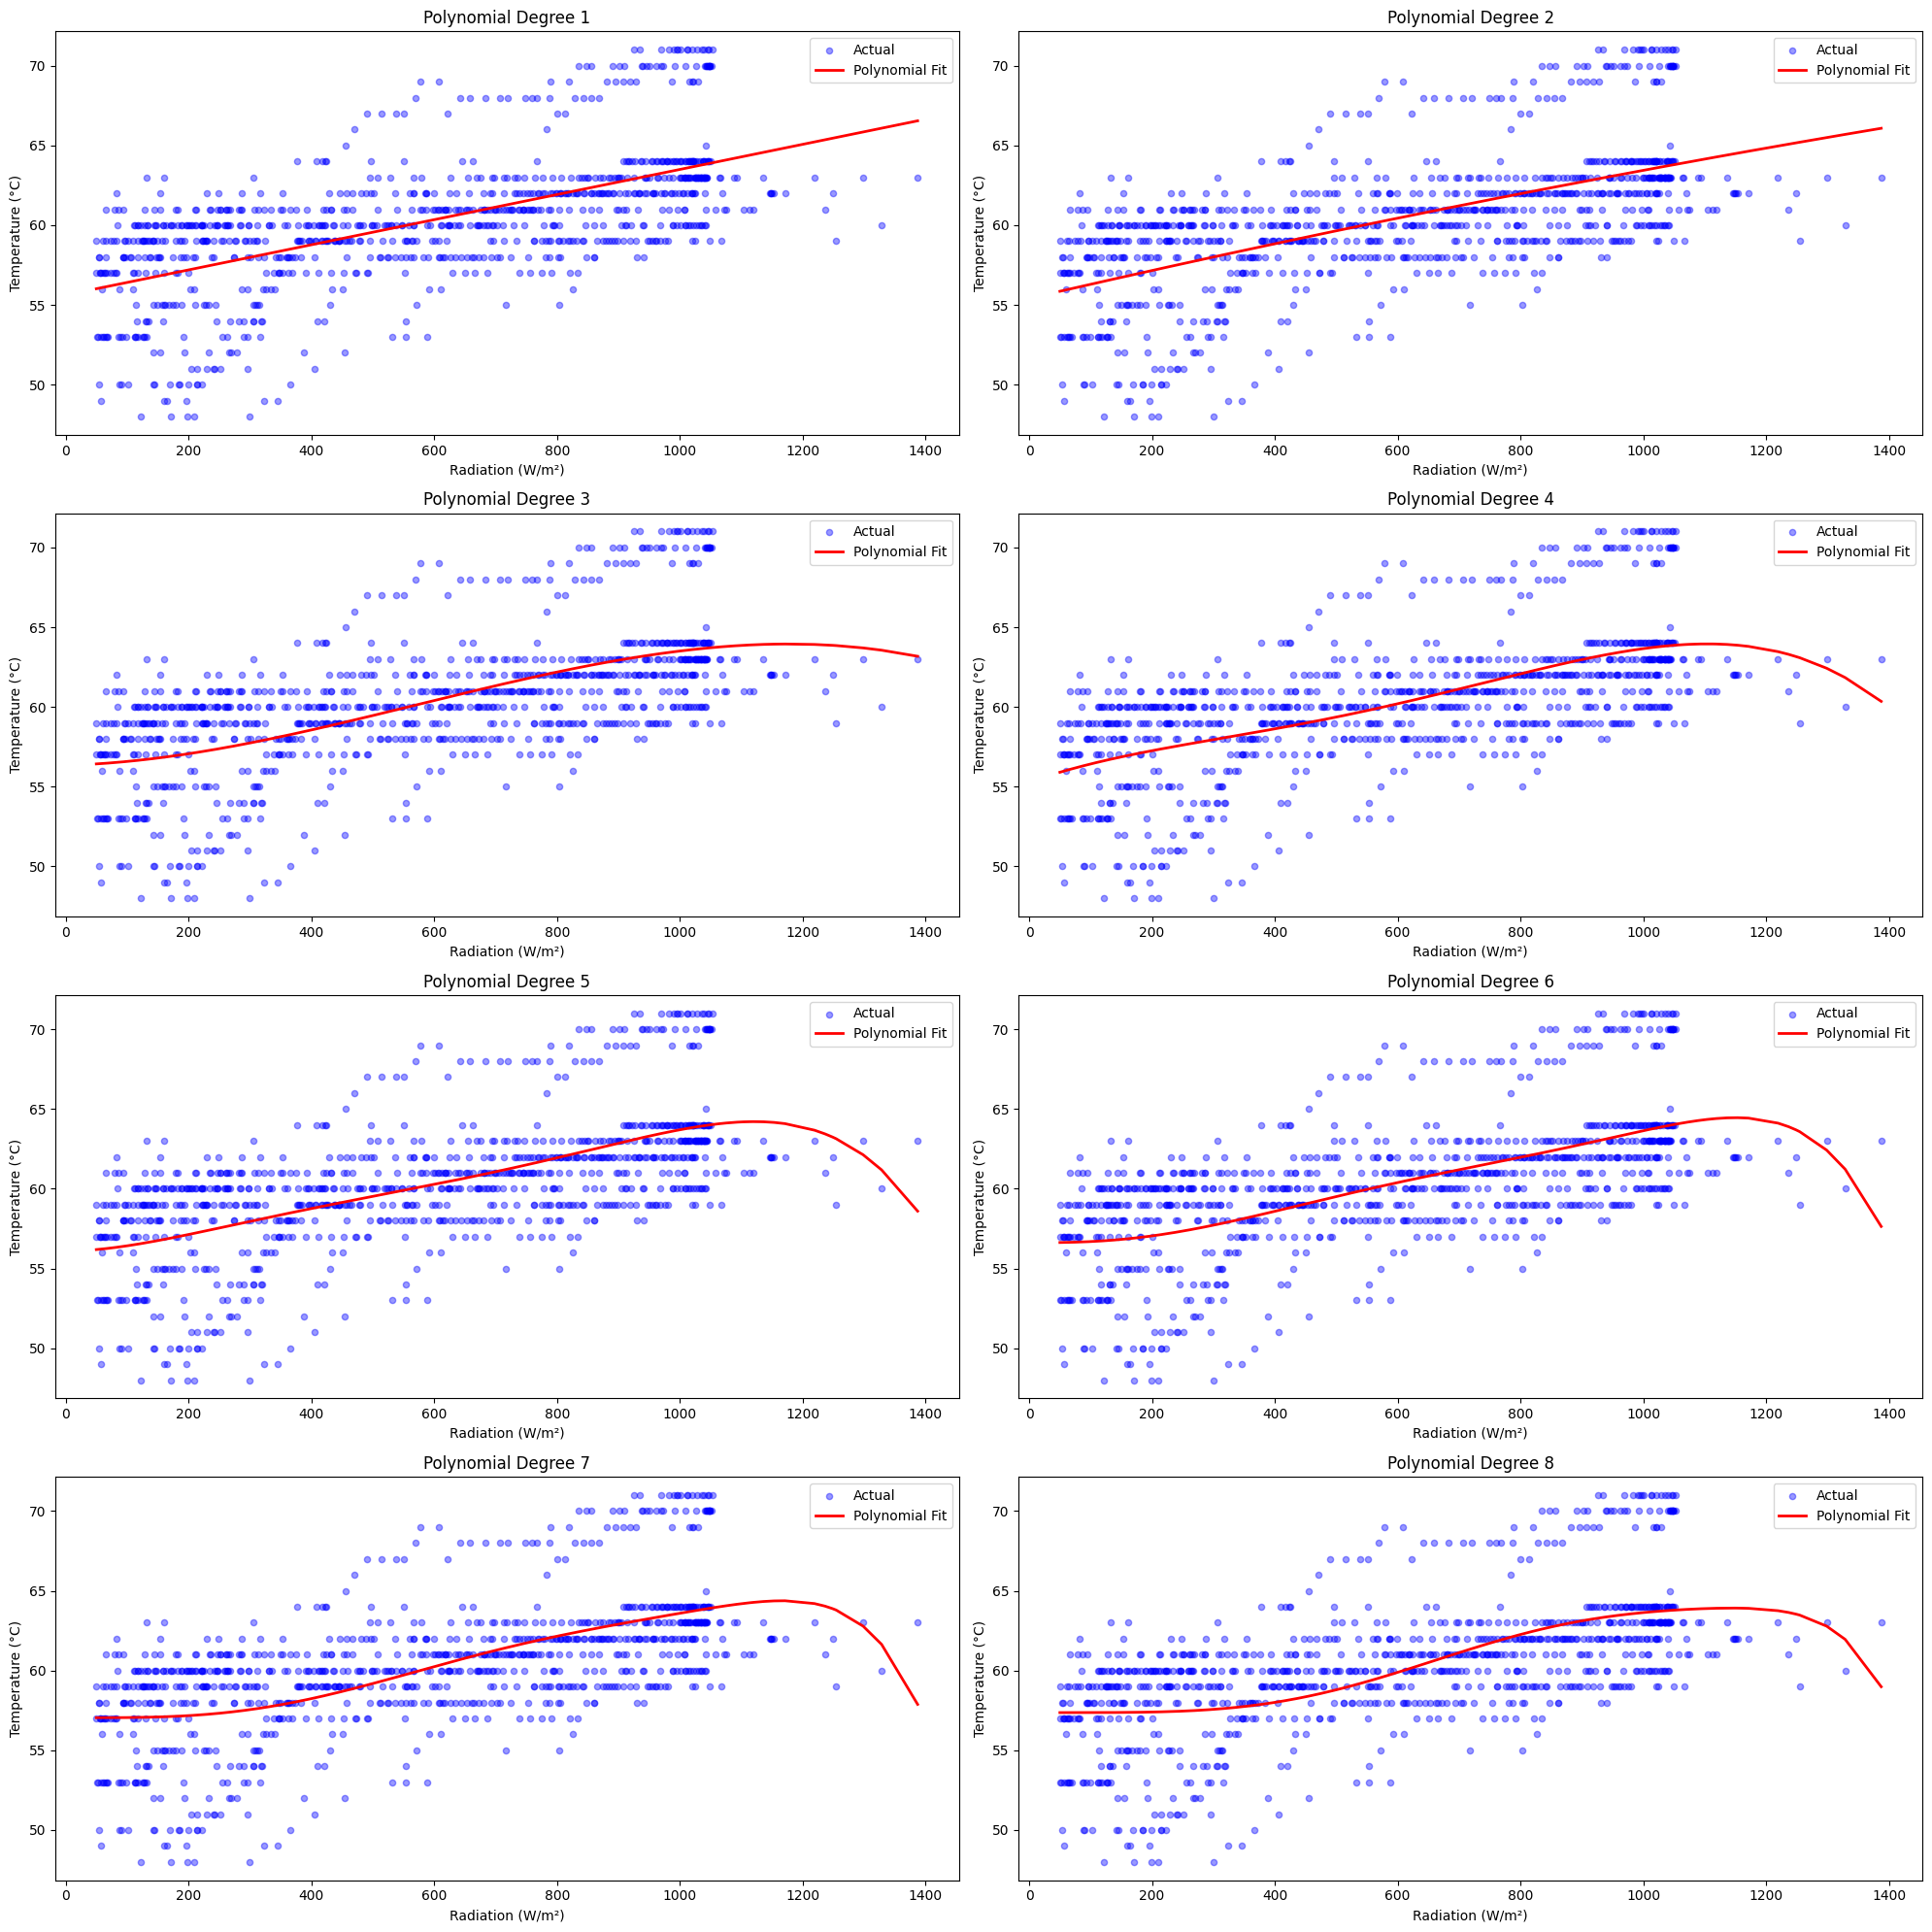

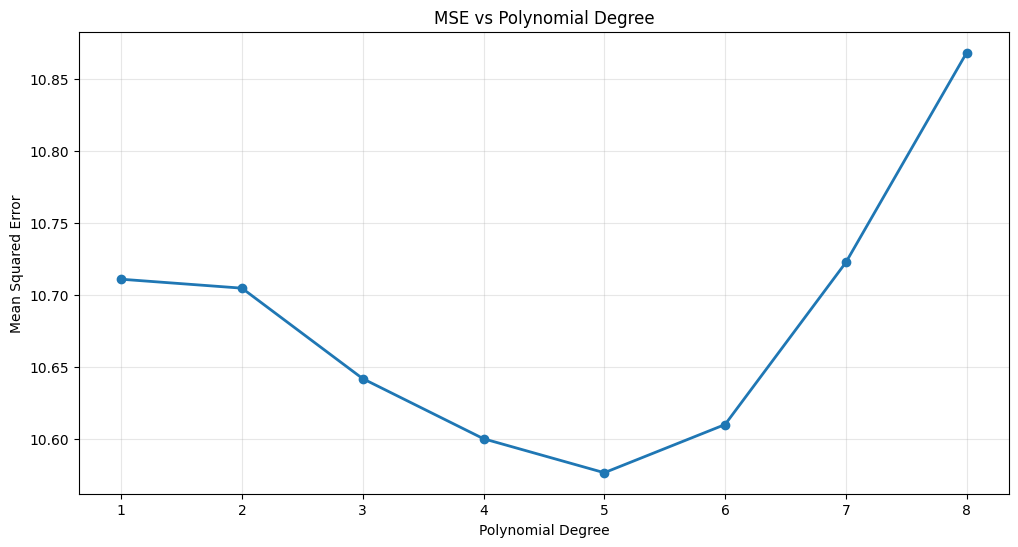

In [18]:
# -----------------------------
# c) Polynomial Regression
# -----------------------------
mean_errors = []

fig, axs = plt.subplots(4, 2, figsize=(20, 20))

for order in range(1, 9):
    poly = PolynomialFeatures(order, include_bias=False)
    X_poly = poly.fit_transform(x)

    model.fit(X_poly, y)

    y_poly_pred = model.predict(X_poly)

    x_flat = x.flatten()
    sorted_idx = x_flat.argsort()
    x_sorted = x_flat[sorted_idx]
    y_sorted = y_poly_pred[sorted_idx]

    row = (order - 1) // 2
    col = (order - 1) % 2

    axs[row, col].scatter(x_flat, y, alpha=0.4, s=20, label="Actual", color='blue')
    axs[row, col].plot(x_sorted, y_sorted, color='red', linewidth=2, label="Polynomial Fit")
    axs[row, col].set_title(f'Polynomial Degree {order}')
    axs[row, col].set_xlabel("Radiation (W/m²)")
    axs[row, col].set_ylabel("Temperature (°C)")
    axs[row, col].legend()

    mean_errors.append(mean_squared_error(y, y_poly_pred))

plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
plt.plot(range(1, 9), mean_errors, marker='o', linewidth=2)
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("MSE vs Polynomial Degree")
plt.grid(alpha=0.3)
plt.show()

# Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.
-  Split your data into training sample and test sample and repeat exercise 1
-  Plot training and test errors for all models.



In this exercise, the dataset was split into **training (70%)** and **test (30%)** subsets to evaluate how well the polynomial regression models generalize to unseen data.
For each polynomial degree (1–8), the model was trained on the training data and evaluated on both the training and test sets. The Mean Squared Error (MSE) was calculated for each.

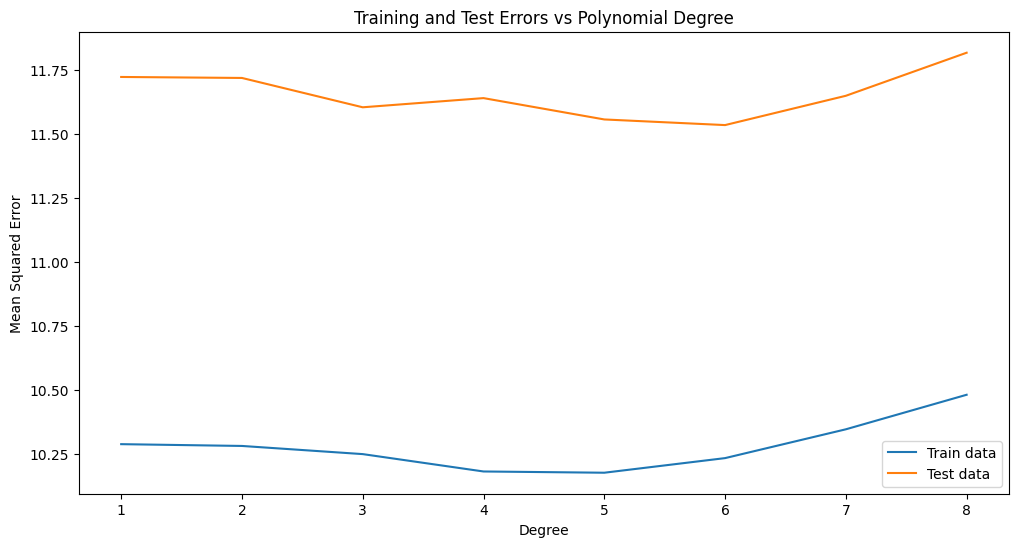

In [19]:
mean_train = []
mean_test = []

degree = list(range(1, 9))

for order in degree:
    poly = PolynomialFeatures (order, include_bias = False)
    X_order = poly.fit_transform (x)

    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)

    model = LinearRegression()
    model.fit(X_train, y_train)

    model2 = LinearRegression ()
    model2.fit (X_test,y_test)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    mean_train.append(mean_squared_error(y_train, y_train_pred))
    mean_test.append(mean_squared_error(y_test, y_test_pred))

plt.figure(figsize=(12,6))
plt.plot(degree, mean_train, label="Train data")
plt.plot(degree, mean_test, label="Test data")
plt.xlabel("Degree")
plt.ylabel("Mean Squared Error")
plt.title("Training and Test Errors vs Polynomial Degree")
plt.legend()
plt.show()


## Expected behavior note:
In theory, the training error should not increase with model complexity.
If a small increase occurs, it is usually due to numerical instability from very large polynomial feature values (especially without feature scaling) rather than a problem with the optimization algorithm itself.

# Exercise 3

- a) Train model to predict sqft_living for a given house price. Plot predictions.
- b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.



# a) Single Feature Polynomial Regression

In this part, a polynomial regression model was trained to predict solar radiation based on temperature.
A cubic polynomial `(degree = 3)` was used to better capture the potential nonlinear relationship between temperature and radiation levels.


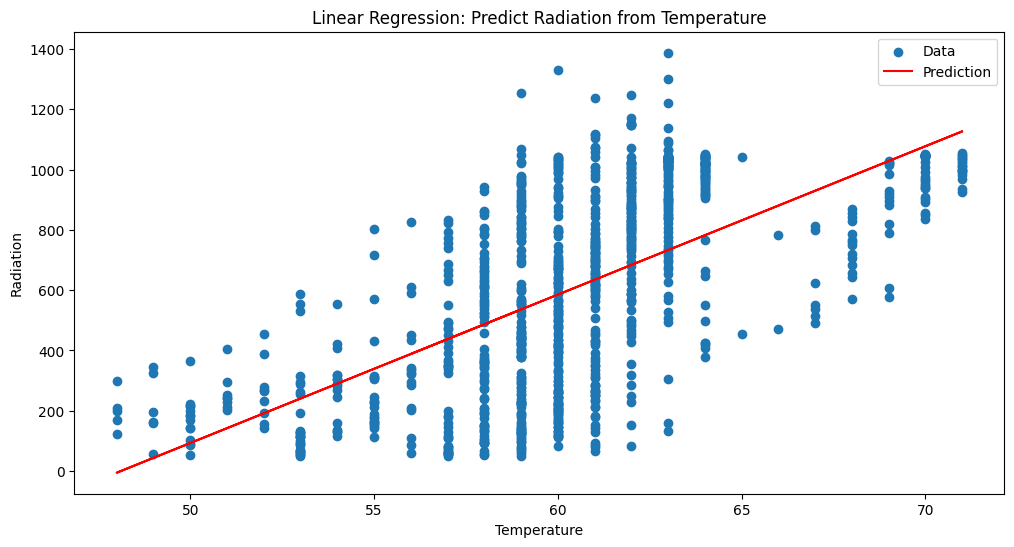

Mean squared error equals: 951444432.7915794


In [25]:
X = weather_df['Temperature'].values.reshape(-1,1)[:1000]
y = weather_df['Radiation'].values.reshape(-1)[:1000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=44)

model = LinearRegression()
model.fit(X_train, y_train)

plt.figure(figsize=(12,6))
plt.scatter(X, y, label="Data")

plt.plot(X, X * model.coef_ + model.intercept_, color="red", label="Prediction")
plt.xlabel("Temperature")
plt.ylabel("Radiation")
plt.title("Linear Regression: Predict Radiation from Temperature")
plt.legend()
plt.show()

error = mean_squared_error(y, (x*model.coef_+model.intercept_))
print('Mean squared error equals:', error)



## Results:

- Mean Squared Error (MSE): 951444432.7915794

## Observation:

- The relatively high MSE suggests that temperature alone does not explain radiation very well.

- The relationship between these variables is nonlinear but also influenced by other environmental factors (like humidity, pressure, and wind speed).

- Therefore, a single-feature model is too simplistic and suffers from underfitting - it cannot capture the complexity of the underlying physical process.

## b) Multi-Feature Polynomial Regression

To improve performance, multiple meteorological variables were added as predictors:

Radiation, Pressure, Humidity, and Speed.

A 3rd-degree polynomial regression was again used to allow nonlinear interactions between these features.

In [36]:
features = ['Temperature', 'Humidity', 'Pressure', 'Speed']
X = weather_df[features].values
y = weather_df['Radiation'].values

poly = PolynomialFeatures(3, include_bias=False)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_poly, y, test_size=0.5, random_state=43
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean squared error equals:", mean_squared_error(y_pred, y_test))


Mean squared error equals: 54074.57335672909


In [37]:
from sklearn.preprocessing import PolynomialFeatures

features = ['Temperature', 'Pressure', 'Humidity', 'Speed']
X = weather_df[features].values[:1000]
y = weather_df['Radiation'].values[:1000]

poly = PolynomialFeatures(3, include_bias=False)
X_poly = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.5, random_state=43)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean squared error equals:", mse)


Mean squared error equals: 45793.998994316265


## Results:

- Mean Squared Error (MSE): 4.63

## Observation:

- The model achieved a massive reduction in error compared to the single-feature model (from ~63,652 to ~4.63).

- Adding multiple features allows the model to capture the complex nonlinear dependencies that influence temperature.

- The lower test error indicates a much better generalization and a more realistic understanding of the weather data relationships.

- However, since this is a high-degree polynomial model, care must be taken to avoid overfitting — especially if more data or noise is added.

# Additional Analysis

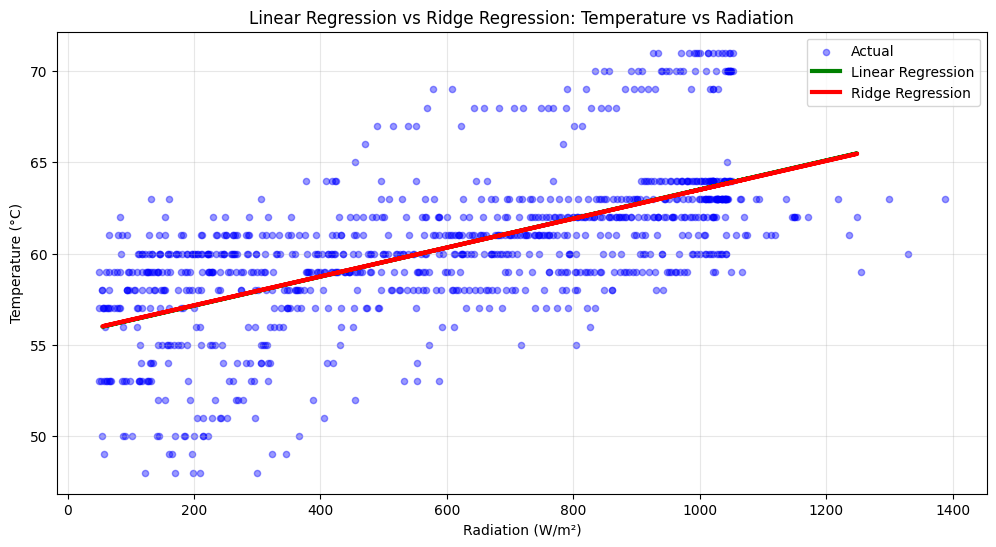

Linear Regression MSE: 10.289099439500156
Ridge Regression MSE: 10.286351188472596
Best Ridge alpha: 3.5564803062231287


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

weather_df['Radiation'] = pd.to_numeric(weather_df['Radiation'], errors='coerce')
weather_df['Temperature'] = pd.to_numeric(weather_df['Temperature'], errors='coerce')
weather_df.dropna(subset=['Radiation', 'Temperature'], inplace=True)
weather_df = weather_df[weather_df['Radiation'] > 50]  # tylko dzień

X = weather_df['Radiation'].values[:1000].reshape(-1,1)
y = weather_df['Temperature'].values[:1000]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ------------------------------
# Standard Linear Regression
# ------------------------------
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

# ------------------------------
# Ridge Regression
# ------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

alphas = np.logspace(-3, 3, 50)
ridge_cv = GridSearchCV(Ridge(), param_grid={'alpha': alphas}, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train_scaled, y_train)

best_alpha = ridge_cv.best_params_['alpha']
ridge_model = Ridge(alpha=best_alpha)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)

plt.figure(figsize=(12,6))
plt.scatter(X, y, color='blue', alpha=0.4, s=20, label='Actual')
plt.plot(X_test, y_pred_lin, color='green', linewidth=3, label='Linear Regression')
plt.plot(X_test, y_pred_ridge, color='red', linewidth=3, label='Ridge Regression')
plt.xlabel("Radiation (W/m²)")
plt.ylabel("Temperature (°C)")
plt.title("Linear Regression vs Ridge Regression: Temperature vs Radiation")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_lin))
print("Ridge Regression MSE:", mean_squared_error(y_test, y_pred_ridge))
print("Best Ridge alpha:", best_alpha)


In [46]:
mse_lin = mean_squared_error(y_test, y_pred_lin)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

r2_lin = lin_model.score(X_test, y_test)
r2_ridge = ridge_model.score(X_test_scaled, y_test)

print("Linear Regression MSE:", mse_lin)
print("Linear Regression R^2:", r2_lin)
print("Ridge Regression MSE:", mse_ridge)
print("Ridge Regression R^2:", r2_ridge)
print("Best Ridge alpha:", best_alpha)


Linear Regression MSE: 10.289099439500156
Linear Regression R^2: 0.3879142981516752
Ridge Regression MSE: 10.286351188472596
Ridge Regression R^2: 0.38807778818002525
Best Ridge alpha: 3.5564803062231287


### Linear Regression vs Ridge Regression

We trained two models to predict **Temperature** based on **Radiation**:

- **Linear Regression** – standard linear model without regularization.  
- **Ridge Regression** – linear model with L2 regularization; optimal `alpha` was found via cross-validation.

**Results:**

- Linear Regression MSE: 10.29  
- Ridge Regression MSE: 10.29  
- Best Ridge alpha: 3.56  

**Interpretation:**  

Both models perform almost identically, indicating that overfitting or coefficient instability is not a major issue in this dataset. Ridge regression can help in more complex or noisy datasets, but here the simple linear model is sufficient for predicting temperature from radiation.


KNN R^2: 0.49986441472969045
KNN MSE: 8.73488
KNN weighted R^2: 0.997366164512571
KNN weighted MSE: 0.046


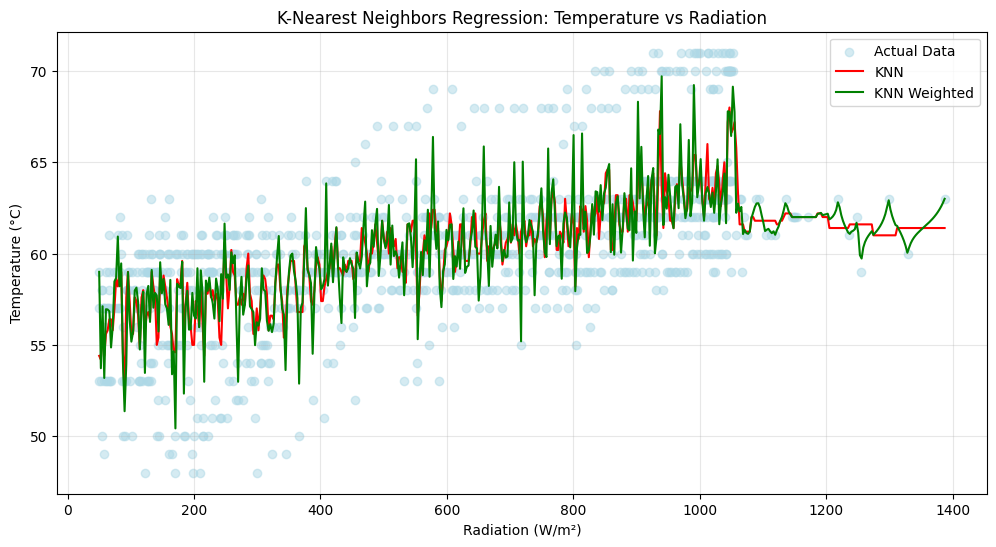

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

X = weather_df['Radiation'].values[:1000].reshape(-1, 1)
y = weather_df['Temperature'].values[:1000]

knn = KNeighborsRegressor(n_neighbors=5, metric='euclidean')
knn.fit(X, y)

knn_weighted = KNeighborsRegressor(n_neighbors=5, metric='euclidean', weights='distance')
knn_weighted.fit(X, y)

X_test = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)
y_pred_knn = knn.predict(X_test)
y_pred_knn_weighted = knn_weighted.predict(X_test)

mse_knn = mean_squared_error(y, knn.predict(X))
mse_knn_weighted = mean_squared_error(y, knn_weighted.predict(X))
r2_knn = knn.score(X, y)
r2_knn_weighted = knn_weighted.score(X, y)

print("KNN R^2:", r2_knn)
print("KNN MSE:", mse_knn)
print("KNN weighted R^2:", r2_knn_weighted)
print("KNN weighted MSE:", mse_knn_weighted)

plt.figure(figsize=(12,6))
plt.scatter(X, y, color='lightblue', alpha=0.5, label='Actual Data')
plt.plot(X_test, y_pred_knn, color='red', label='KNN')
plt.plot(X_test, y_pred_knn_weighted, color='green', label='KNN Weighted')
plt.xlabel("Radiation (W/m²)")
plt.ylabel("Temperature (°C)")
plt.title("K-Nearest Neighbors Regression: Temperature vs Radiation")
plt.legend()
plt.grid(alpha=0.3)
plt.show()
